<a href="https://colab.research.google.com/github/kelleyl54/DSPS_LKelley/blob/master/HW2_lKelley/DSPS_HW2_2_lKelley.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Written by Federica B. Bianco @fedhere
UDel DSPS 2019

 # Homework 2

 This is a skeleton & instruction notebook

-  GENERATE  100 samples of different sizes N (N>10 & N<2000) from each of 5 different distributions (500 samples in total), 
 _all with the same population mean_. Include a _Normal_, a _Poisson_, a _Binomial_, a _Chi-Squared_ distribution, and 1 more of your choice.                                       
-  For each sample plot the sample mean (dependent var.) against the sample size N (independent var.) (if you want you can do it with the sample standard deviation as well). 
-  Describe the behavior you see in the plots in terms of the law of large numbers.
-  PLOT the distributions of all sample means (together for all distributions). _Mandatory_: as a histogram. _Optional_: in any other way you think is convincing
 Extra Credit: FIT a gaussian to the distribution of means            

In [4]:
from __future__ import print_function
__author__= 'fbb'

import pylab as pl
# this package sets up pretty plots
from scipy.optimize import curve_fit, minimize
    
%pylab inline
import seaborn
seaborn.set_style("darkgrid")


Populating the interactive namespace from numpy and matplotlib


## choose which distributions to use 

In [0]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
distributions = ['chisq']


## and which mean to give it

In [0]:
mymean = 100

# Let's see what this distribution looks like, what is the PDF, and how are the moments defined. Wikipedia is great for this! 

![1](https://github.com/fedhere/DSPS/blob/master/HW2/chisq1.png?raw=1)

![2](https://github.com/fedhere/DSPS/blob/master/HW2/chisq2.png?raw=1)

# Then lets look at the numpy random sampling package to see how I create the distribution
http://docs.scipy.org/doc/numpy/reference/routines.random.html
http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.chisquare.html#numpy.random.chisquare



In [0]:
# the chi sq distribution takes the number of degrees of freedom, which luckily is the same as the mean!
df = mymean

## I am making a dictionary to host the distributions.

that is only one possible option. with a dictionary I can easily inspect the distribution I want by its name: it is a very human friendly data storage. In this example I am only using a single distribution, so for me it is overkill, but if I were doing the whole exercise with 5 or 6 distributions it would be useful!

Lets start by looking at a single chi sq distribution

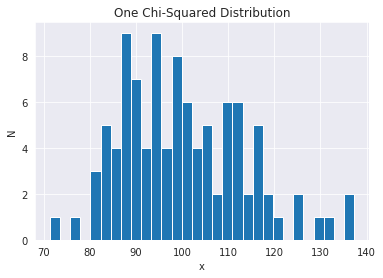

In [8]:
# Note: I am adding imports here, to show the workflow: 
# at this point I realize what packages I need and I import them. 
# but this is a PEP8 violation. 
# It is a good habit to put the includes at the top 
# so the code fails right away if the packages are missing. 
# Otherwise a user may have a piece of code running for a long time, 
# and then fail when the package cannot be imported... 
# (unless they are only imported under conditions, e.g. in an if statement)

import numpy as np
np.random.seed(456)
md = {}
# md is an empty disctionary; 
# if you are not familiar with python dictionaries see https://www.pythonforbeginners.com/dictionary/how-to-use-dictionaries-in-python
md['chisq'] = np.random.chisquare(mymean, size=100)
# md now is a dictionary with one object: an array by the key 'chisq'
pl.hist(md['chisq'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.title("One Chi-Squared Distribution");

### Figure 1: Chi sq distribution of a sample of size 100 for a Chi square distribution with  100 degrees of freedom. 

## let numpy calculate what the mean and stdev of this distribution are

In [9]:
print ("Chisq mean: %.2f, standard deviation: %.2f"%(md['chisq'].mean(), md['chisq'].std()))

Chisq mean: 100.09, standard deviation: 13.24


## Now let's do it for 100 Chisq distributions
we want distributions of different sizes (all integers between 10 and 2000). It's a good idea to create more small distributions, cause, as we will see, their means will be more noisy (due to the law of large numbers which we will discuss in class)

In [10]:
mysize = (2000 / (np.array(range(1, 100)))).astype(int)
# mysize = 1000 / (np.array(range(1, 100) + [10]))
# mysize = (np.random.rand(100) * 1000).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (99,)


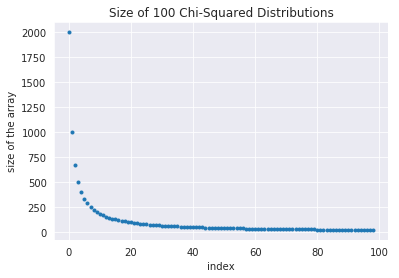

In [11]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")
pl.title('Size of 100 Chi-Squared Distributions');

Text(1259.3999999999999, 100, 'expected mean')

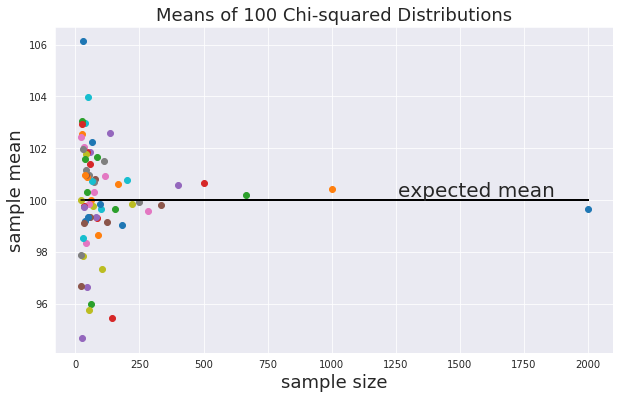

In [12]:
# I am gonna overwrite the disctionary entry created into a nested dictionary 
# the outside dictionary hosts the distributions as dictionary, 
# and each distribution dictionary contains the 100 distribution (arrays of diferent sizes)

md['chisq'] = {} 

#and do it in a for loop. not pythonic, but easily readable

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
    
# save the means for plotting later    

md['chisq']['means'] = {}
axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        #and plot it
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Means of 100 Chi-squared Distributions', fontsize=18)
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axchisq_mu_n.text(axchisq_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

### Figure 2: This figure shows how for small sample sizes, the randomness of each distribution leads to a deviation from the expected value for the mean. As sample size increases, the calculated mean is closer to the expected mean, in accordance with the Law of Large Numbers, which says that results obtained should approach the expected value when a lot of trials are performed. 

# now the histogram of the mean of all samples: 
## this requires some data wrangling, since i put the data in a dictionary which is a user friendly data structure, but perhaps not the most machine friendly one

a coder friendly, though not terribly pythonic way to do it is to append each mean in a list in a for loop, and then hist that. be careful: if your data size gets large this becomes a very bad idea!!

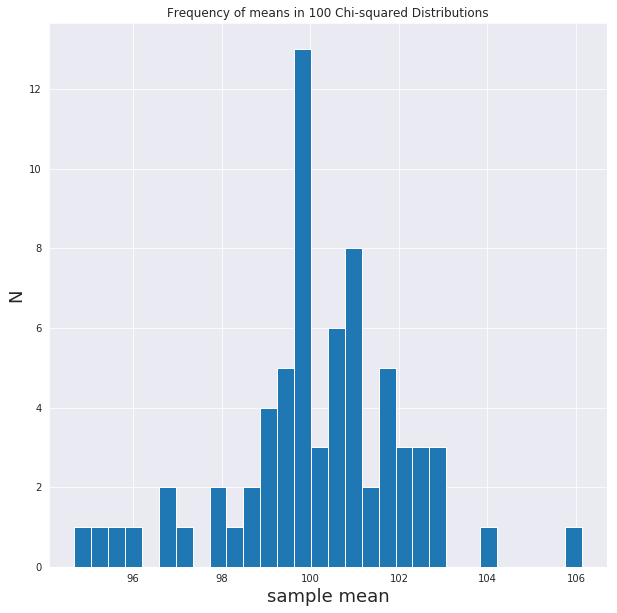

In [13]:
allmeanschi = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeanschi,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Frequency of means in 100 Chi-squared Distributions");

## Figure 3: This histogram shows the distribution of means for the 100 chi-squared distributions generated above. Not every mean is close to the expected mean of 100, which is evidence of the randomness factor when each distribution is generated. More importantly, the distribution of means appears to have a Gaussian distribution centered around 100 even though a Chi distribution was used, which is in accordance with the central limit theorem.

# Do it for the Normal distribution


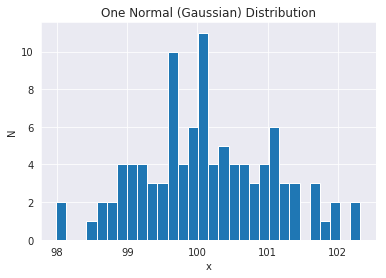

In [14]:
distributions = ['gaus'];
mymean=100;
stdev=1;

import numpy as np
np.random.seed(456)
md = {}
md['gaus'] = np.random.normal(mymean,stdev, size=100)
pl.hist(md['gaus'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.title("One Normal (Gaussian) Distribution");

**Figure 4: One normal distribution with a mean of 100**

In [15]:
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['gaus'].mean(), md['gaus'].std()))

Normal mean: 100.14, standard deviation: 0.92


In [16]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (100,)


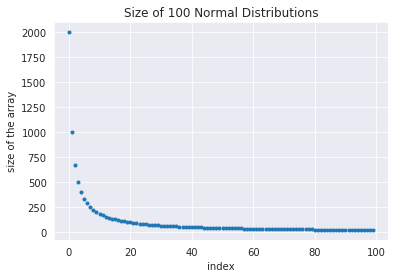

In [17]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")
pl.title("Size of 100 Normal Distributions");

Text(1259.3999999999999, 100, 'expected mean')

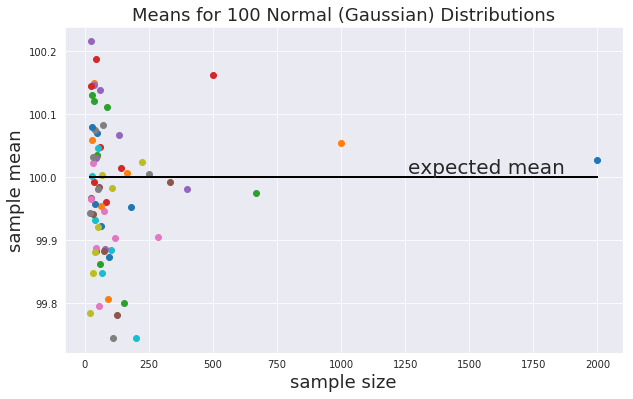

In [53]:
md['gaus'] = {} 

for n in mysize:
    md['gaus'][n] = np.random.normal(mymean, size=100)

md['gaus']['means'] = {}
axnorm_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        axnorm_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axnorm_mu_n.set_xlabel('sample size', fontsize=18)
        axnorm_mu_n.set_ylabel('sample mean', fontsize=18)
        axnorm_mu_n.set_title('Means for 100 Normal (Gaussian) Distributions', fontsize=18)
        axnorm_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')
axnorm_mu_n.text(axnorm_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 5: A plot of the means from 100 normal distributions with the expected mean centered around 100. This plot also demonstrates the Law of Large Numbers. For lower sample sizes, the means are relatively spread out, but the sample means aproach the expected mean as the sample size grows.**

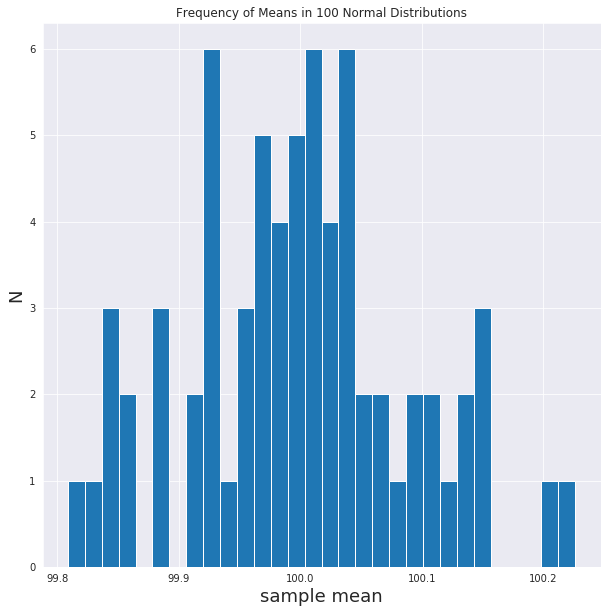

In [19]:
allmeansnorm = list(md['gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeansnorm,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Frequency of Means in 100 Normal Distributions");

**Figure 6: A collection of 100 means for normal distributions centered around 100. In terms of the Central Limit Theorem, the distribution of means also forms a Gaussian curve with a mean of 100**

# Do it for the Poisson distribution

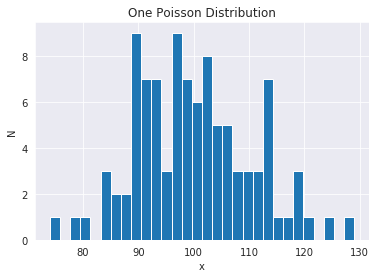

In [20]:
distributions = ['pois'];
interval =100;

import numpy as np
np.random.seed(456)
md = {}
md['pois'] = np.random.poisson(interval, size=100)
pl.hist(md['pois'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.title("One Poisson Distribution");

**Figure 7: One Poisson distribution with an expected mean of 100**

In [21]:
print ("Poisson mean: %.2f, standard deviation: %.2f"%(md['pois'].mean(), md['pois'].std()))

Poisson mean: 99.90, standard deviation: 10.46


In [22]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (100,)


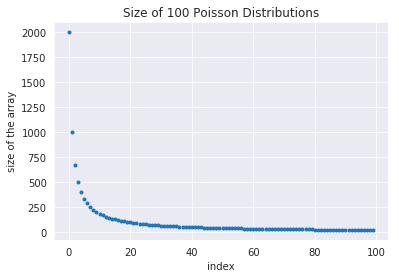

In [23]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")
pl.title("Size of 100 Poisson Distributions");

Text(1259.3999999999999, 100, 'expected mean')

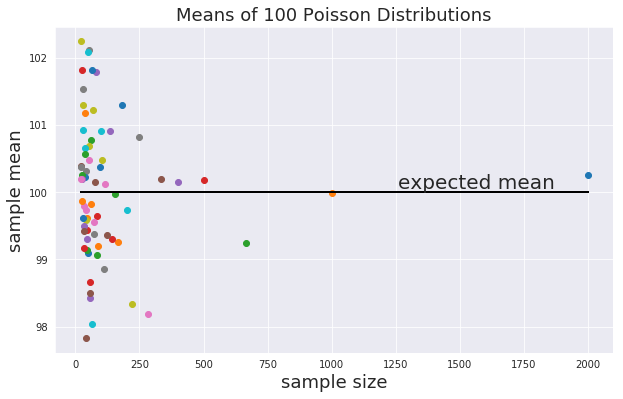

In [48]:
md['pois'] = {} 

for n in mysize:
    md['pois'][n] = np.random.poisson(interval, size=100)

md['pois']['means'] = {}
axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Means of 100 Poisson Distributions', fontsize=18)
        axpois_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axpois_mu_n.text(axpois_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 8: A plot of the means from 100 Poisson distributions with the expected mean centered around 100. This plot also demonstrates the Law of Large Numbers. For lower sample sizes, the means are relatively spread out, but the sample means aproach the expected mean as the sample size grows.**

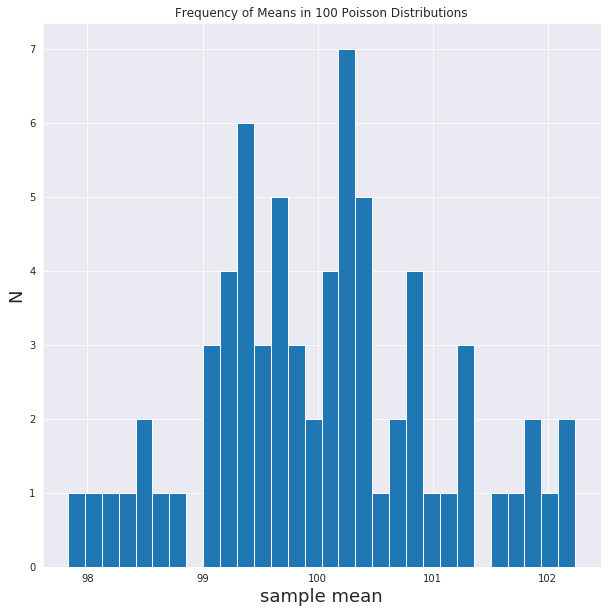

In [49]:
allmeanspois = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeanspois,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Frequency of Means in 100 Poisson Distributions");

**Figure 9: A collection of 100 means for Poisson distributions centered around 100. In terms of the Central Limit Theorem, the distribution of means forms a Gaussian curve with a mean of 100, even though the means come from samples of a different type of distribution.**

# Do it for the Binomial distribution

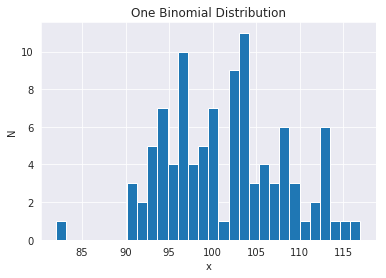

In [26]:
distributions = ['binomial'];
n=200;
p=.5;

import numpy as np
np.random.seed(455)
md = {}
md['binomial'] = np.random.binomial(n,p,100)
pl.hist(md['binomial'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.title("One Binomial Distribution");

**Figure 10: One distribution with an expected mean of 100**

In [27]:
print ("Binomial mean: %.2f, standard deviation: %.2f"%(md['binomial'].mean(), md['binomial'].std()))

Binomial mean: 101.43, standard deviation: 6.74


In [28]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (100,)


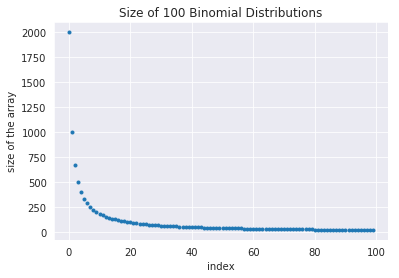

In [29]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")
pl.title("Size of 100 Binomial Distributions");

Text(1259.3999999999999, 100, 'expected mean')

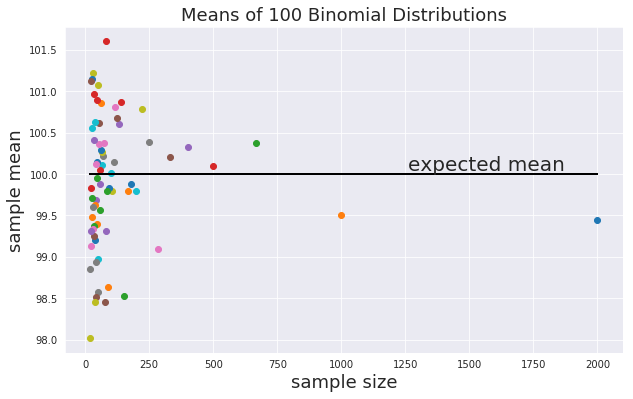

In [30]:
md['binomial'] = {} 

for n in mysize:
    md['binomial'][n] = np.random.binomial(200,p,100)

md['binomial']['means'] = {}
axbinom_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        axbinom_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinom_mu_n.set_xlabel('sample size', fontsize=18)
        axbinom_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinom_mu_n.set_title('Means of 100 Binomial Distributions', fontsize=18)
        axbinom_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axbinom_mu_n.text(axbinom_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 11: A plot of the means from 100 binomial distributions with the expected mean centered around 100. This plot also demonstrates the Law of Large Numbers. For lower sample sizes, the means are relatively spread out, but the sample means generally aproach the expected mean as the sample size grows.**

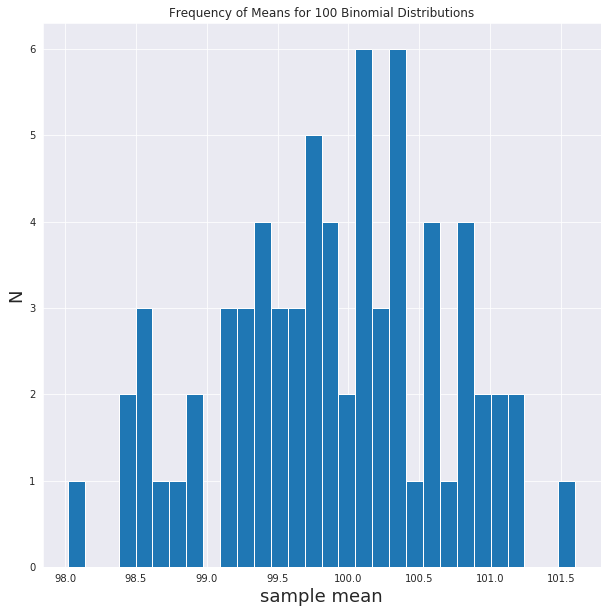

In [31]:
allmeansbinom = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeansbinom,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Frequency of Means for 100 Binomial Distributions");

**Figure 12: A collection of 100 means for binomial distributions centered around 100. In terms of the Central Limit Theorem, the distribution of means forms a Gaussian curve with a mean of 100, even though the means come from samples of a different type of distribution.**

# Do it for another distribution
I chose the exponential distribution

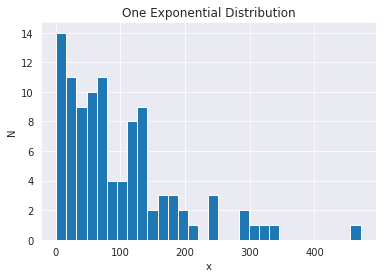

In [51]:
distributions = ['exp'];
n=100;

import numpy as np
np.random.seed(444)
md = {}
md['exp'] = np.random.exponential(n,100)
pl.hist(md['exp'], bins = 30)
pl.ylabel('N')
pl.xlabel('x');
pl.title("One Exponential Distribution");

**Figure 13: One exponential distribution with an expected mean of 100.**

In [52]:
print ("Exponential mean: %.2f, standard deviation: %.2f"%(md['exp'].mean(), md['exp'].std()))

Exponential mean: 97.18, standard deviation: 86.76


In [34]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
print ("shape of the 'size' list that contains the size of each distribution", mysize.shape)

shape of the 'size' list that contains the size of each distribution (100,)


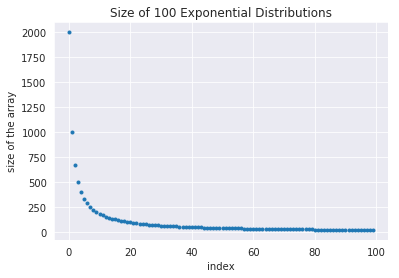

In [35]:
pl.plot(mysize, '.')
pl.xlabel("index")
pl.ylabel("size of the array")
pl.title("Size of 100 Exponential Distributions");

Text(1259.3999999999999, 100, 'expected mean')

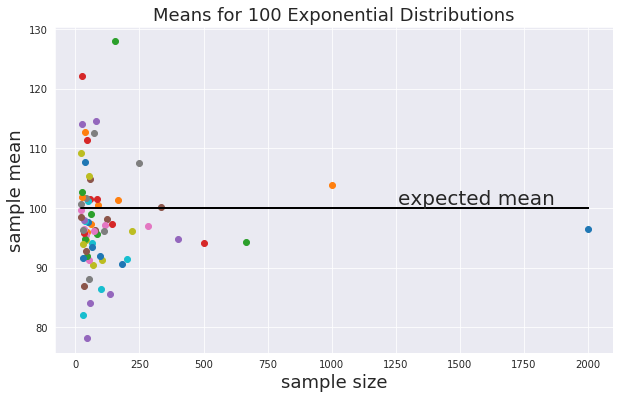

In [42]:
md['exp'] = {} 

for n in mysize:
    md['exp'][n] = np.random.exponential(100,100)

md['exp']['means'] = {}
axexp_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['exp']:
    if not type(nn) == str:
        md['exp']['means'][nn] = md['exp'][nn].mean()
        axexp_mu_n.plot(nn, md['exp']['means'][nn], 'o')
        axexp_mu_n.set_xlabel('sample size', fontsize=18)
        axexp_mu_n.set_ylabel('sample mean', fontsize=18)
        axexp_mu_n.set_title('Means for 100 Exponential Distributions', fontsize=18)
        axexp_mu_n.plot([min(mysize), max(mysize)], [mymean, mymean], 'k')
axexp_mu_n.text(axexp_mu_n.get_xlim()[1] * .6, 100, "expected mean", 
                  va="bottom", fontsize=20)

**Figure 14: A plot of the means from 100 exponential distributions with the expected mean centered around 100. This plot also demonstrates the Law of Large Numbers. For lower sample sizes, the means are relatively spread out, but the sample means generally aproach the expected mean as the sample size grows.**

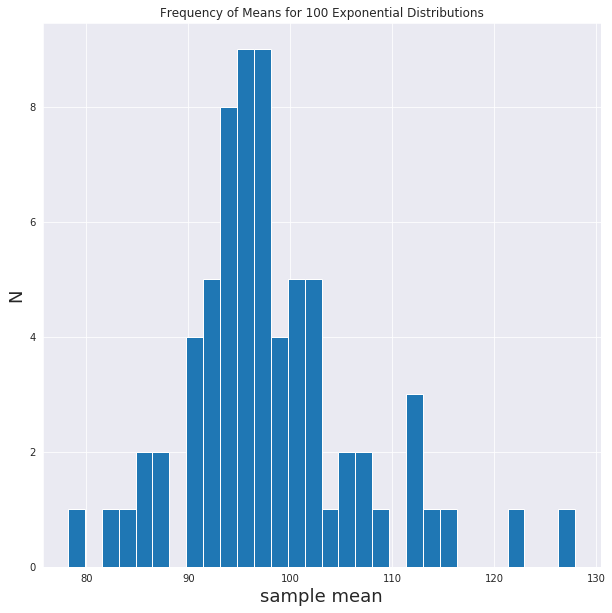

In [43]:
allmeansexp = list(md['exp']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeansexp,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title("Frequency of Means for 100 Exponential Distributions");

**Figure 15: A collection of 100 means for exponential distributions centered around 100. In terms of the Central Limit Theorem, the distribution of means forms a Gaussian curve with a mean of 100, even though the means come from samples of a different type of distribution.**

# 667 students: fita  a Gaussian to the histogram of the means for each distribution

to fit a curve to data you can, for example, use scipy.optimize.curve_fit(). Your y value should be the hight of each histogram bin, which you can extract by capturing the output of pl.hist() when you plot the histogram. 

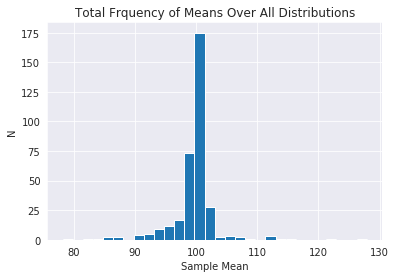

In [50]:
ydata = pl.hist(allmeanschi+allmeanspois+allmeansnorm+allmeansbinom+allmeansexp, bins=30)
pl.xlabel("Sample Mean");
pl.ylabel("N");
pl.title("Total Frquency of Means Over All Distributions");

**Figure 16: This is a collection of all means for all 500 samples over 5 types of distributions. Note that this final distirubtion takes on a Gaussian form centered at 100, which makes sense in the context of the central limit theorem.**

And you can create your own Gaussian function to pass to curve_fit as this for example: 

In [0]:
def gaussian(x, mu=0.0, sigma=1.0):
    ''' 
     A function that plots a point to a gaussian curve based on the parameters of that curve
     
     Inputs: 
     x - the point on the curve to be inserted into the function
     mu - the mean of the gaussian distribution
     sigma - the standard deviation of the gaussian distribution
     
     returns the value of the point along the gaussian curve
    '''
    
    return 1./(np.sqrt(2.*np.pi()*sigma**2.))*np.exp(-1.*(x-mu)**2./(2.*sigma**2.));

Or you can use existing functions (scipy has one, but it would be instructive for you to write it yourself!)

In [40]:
curve_fit(gaussian,

SyntaxError: ignored